# PET simulation analysis

Analysis after the simulation :
- in folder: pet/
- macro: main.mac


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy.interpolate import griddata
from matplotlib import collections  as mc
import numpy as np
from ipywidgets import interact
import os
from pathlib import Path
import uproot
import pandas as pd

In [19]:
# The following command display the current working directory (where jupyter has been launched)
cwd = os.getcwd()
print('The Current Working Directory (CWD) is: \n', cwd)
folder = Path('/Users/cmwever73/Desktop/phytoPET/jnb_example/')
if (not folder.is_dir()):
    print('ERROR: {} is not a folder.'.format(folder))
filename = os.path.join(folder, 'sim_data.root')
f = uproot.open(filename)

The Current Working Directory (CWD) is: 
 /Users/cmwever73/Desktop/phytoPET/jnb_example


In [20]:
print("List of keys: \n", f.keys())

List of keys: 
 [b'Singles;353', b'Singles;352', b'latest_event_ID;1', b'total_nb_primaries;1', b'Hits;1', b'OpticalData;1', b'Coincidences;1', b'delay;1']


In [21]:
singles = f[b'Singles']
print('Number of Singles :', len(singles))
print('Singles: ')
for i in singles.keys():
    print(i, ' ', end='')

Number of Singles : 352604
Singles: 
b'runID'  b'eventID'  b'sourceID'  b'sourcePosX'  b'sourcePosY'  b'sourcePosZ'  b'time'  b'energy'  b'globalPosX'  b'globalPosY'  b'globalPosZ'  b'gantryID'  b'blockID'  b'crystalID'  b'unused3ID'  b'unused4ID'  b'unused5ID'  b'comptonPhantom'  b'comptonCrystal'  b'RayleighPhantom'  b'RayleighCrystal'  b'axialPos'  b'rotationAngle'  b'comptVolName'  b'RayleighVolName'  

In [22]:
time = singles.arrays()[b'time'] 
energy = singles.arrays()[b'energy']
crystalID = singles.arrays()[b'crystalID']
#each crystal has an ID there would 4608 of them total (48x48x2), 2304 per crystal 
x = singles.arrays()[b'globalPosX']
y = singles.arrays()[b'globalPosY']
z = singles.arrays()[b'globalPosZ']

crystalarr1 = np.column_stack((x,y,z,crystalID,energy,time))
crystalarr1[:,4] *= 1000
crystalarr = crystalarr1[np.where((crystalarr1[:,4] > 100))[0]]
singA = crystalarr[np.where((crystalarr[:, 0] < 0.000))[0]]
#This is here, if you want to save information in a txt file
#np.savetxt('singA.txt', singA)
#print(len(singA))

singB = crystalarr[np.where((crystalarr[:, 0] > 0.000))[0]]
#np.savetxt('singB.txt', singB)
#print(len(singB))

# Energy Deposition of Simulated Data

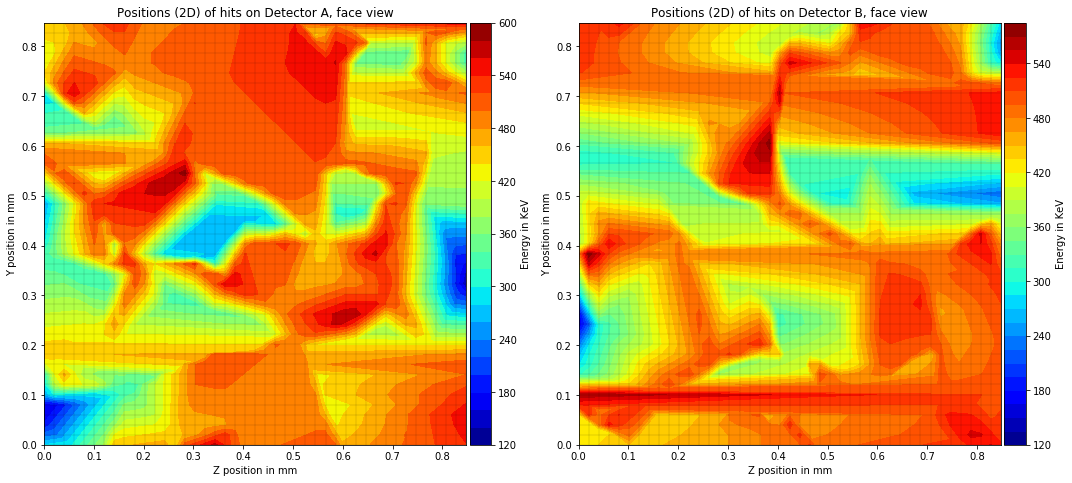

In [6]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
leng = 161007
fig, ax = plt.subplots(1,2, figsize=(15, 15))
#singA = np.loadtxt(fname = "singA.txt", dtype = 'float')
xA = singA[:leng, 0]
yA = singA[:leng, 1]
zA = singA[:leng, 2]
dA = singA[:leng, 4]
yminA = min(singA[:leng, 1])
ymaxA = max(singA[:leng, 1])
zminA = min(singA[:leng, 2])
zmaxA = max(singA[:leng, 2])
    
#singB = np.loadtxt(fname = "singB.txt", dtype = 'float')
xB = singB[:leng, 0]
yB = singB[:leng, 1]
zB = singB[:leng, 2]
dB = singB[:leng, 4]
yminB = min(singB[:leng, 1])
ymaxB = max(singB[:leng, 1])
zminB = min(singB[:leng, 2])
zmaxB = max(singB[:leng, 2])

#zi, yi = np.meshgrid(np.linspace(-0.4625, 0.4625, 48), np.linspace(-0.4625, 0.4625, 48))
ziRdg, yiRdg = np.meshgrid(np.linspace(0, 0.84792, 43), np.linspace(0, 0.84792, 43))
Z,Y = np.meshgrid(ziRdg,yiRdg)

#Z,Y = np.meshgrid(zi,yi)
Z,Y = np.meshgrid(ziRdg,yiRdg)

diA = griddata((zA, yA), dA, (Z, Y))
diB = griddata((zB, yB), dB, (Z, Y))

posA = ax[0].contourf(Z, Y, diA, 30, cmap='jet')
ax[0].plot(ziRdg, yiRdg, 'k-', lw=0.3, alpha=0.4)
ax[0].plot(ziRdg.T, yiRdg.T, 'k-', lw=0.3, alpha=0.4)
ax[0].set_title('Positions (2D) of hits on Detector A, face view')
ax[0].set_xlabel('Z position in mm')
ax[0].set_ylabel('Y position in mm')
ax[0].set_aspect('equal')

divider = make_axes_locatable(ax[0])
cax2 = divider.append_axes("right", size="5%", pad=0.05)
cbr = fig.colorbar(posA, cax=cax2)
cbr.ax.set_ylabel('Energy in KeV')
plt.tight_layout(h_pad=1)


posB = ax[1].contourf(Z, Y, diB, 30, cmap='jet')
ax[1].plot(ziRdg, yiRdg, 'k-', lw=0.3, alpha=0.4)
ax[1].plot(ziRdg.T, yiRdg.T, 'k-', lw=0.3, alpha=0.4)
ax[1].set_title('Positions (2D) of hits on Detector B, face view')
ax[1].set_xlabel('Z position in mm')
ax[1].set_ylabel('Y position in mm')
ax[1].set_aspect('equal')

divider = make_axes_locatable(ax[1])
cax2 = divider.append_axes("right", size="5%", pad=0.05)
cbr = fig.colorbar(posB, cax=cax2)
cbr.ax.set_ylabel('Energy in KeV')
plt.tight_layout(h_pad=1)

#dims = 0.4625/48

#plt.savefig('../Plots/sing_energy1.png')

# Counts Per Crystal Simulated Data

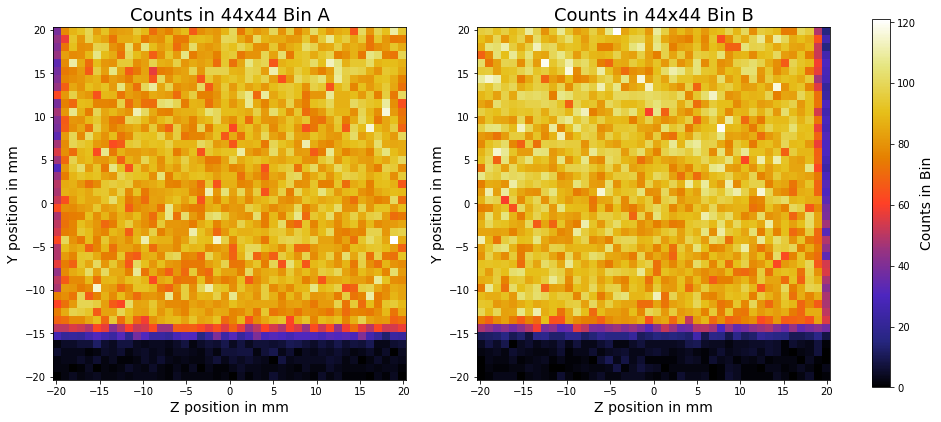

In [7]:
fig, ax = plt.subplots(1,2, figsize=(15, 15))

h = ax[0].hist2d(-zA, yA, bins=44, cmap='CMRmap')
ax[0].set_title('Counts in 44x44 Bin A', fontsize=18)
ax[0].set_xlabel('Z position in mm', fontsize=14)
ax[0].set_ylabel('Y position in mm', fontsize=14)
ax[0].set_aspect('equal')

h1= ax[1].hist2d(zB, yB, bins=44, cmap='CMRmap')
ax[1].set_title('Counts in 44x44 Bin B', fontsize=18)
ax[1].set_xlabel('Z position in mm', fontsize=14)
ax[1].set_ylabel('Y position in mm', fontsize=14)
ax[1].set_aspect('equal')

cbar = plt.colorbar(h[3], ax=ax, fraction=.022)
cbar.ax.set_ylabel('Counts in Bin', fontsize=14)

plt.savefig('Plots/singles_pos_allbaised_44.png')

# Counts in Annode Simulated Data

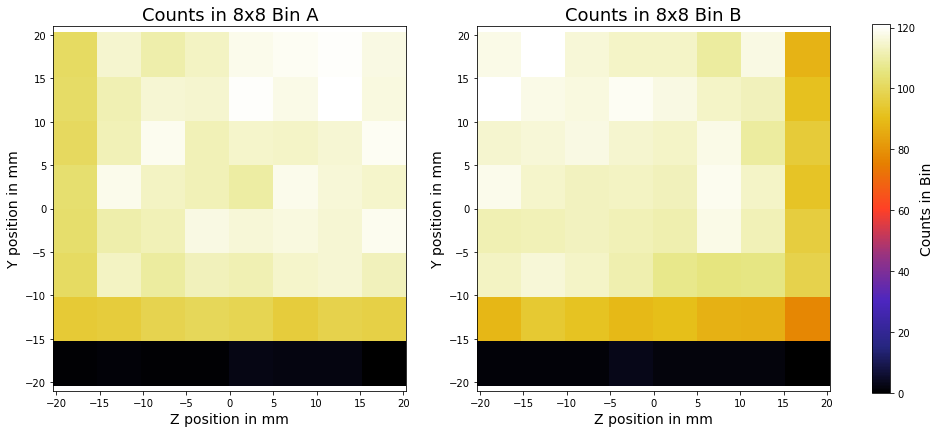

In [8]:
fig, ax = plt.subplots(1,2, figsize=(15, 15))
h2 = ax[0].hist2d(-zA, yA, bins=8, cmap='CMRmap')
ax[0].set_title('Counts in 8x8 Bin A', fontsize=18)
ax[0].set_xlabel('Z position in mm', fontsize=14 )
ax[0].set_ylabel('Y position in mm', fontsize=14 )
ax[0].set_ylim(-21, 21)
ax[0].set_aspect('equal')

h3= ax[1].hist2d(zB, yB, bins=8, cmap='CMRmap')
ax[1].set_title('Counts in 8x8 Bin B', fontsize=18)
ax[1].set_xlabel('Z position in mm', fontsize=14 )
ax[1].set_ylabel('Y position in mm', fontsize=14 )
ax[1].set_ylim(-21, 21)
ax[1].set_aspect('equal')
cbar = plt.colorbar(h[3], ax=ax, fraction=.022)
cbar.ax.set_ylabel('Counts in Bin', fontsize=14 )

plt.savefig('Plots/singles_pos_allbaised_anode.png')

In [9]:
#Read in RDG Excel Data
df = pd.read_excel (r'rdg_data.xlsx')
aar = df[["x1", "y1", "e1", "time"]].to_numpy()
bar = df[["x2", "y2", "e2", "time"]].to_numpy()

# Energy Deposition RDG Data

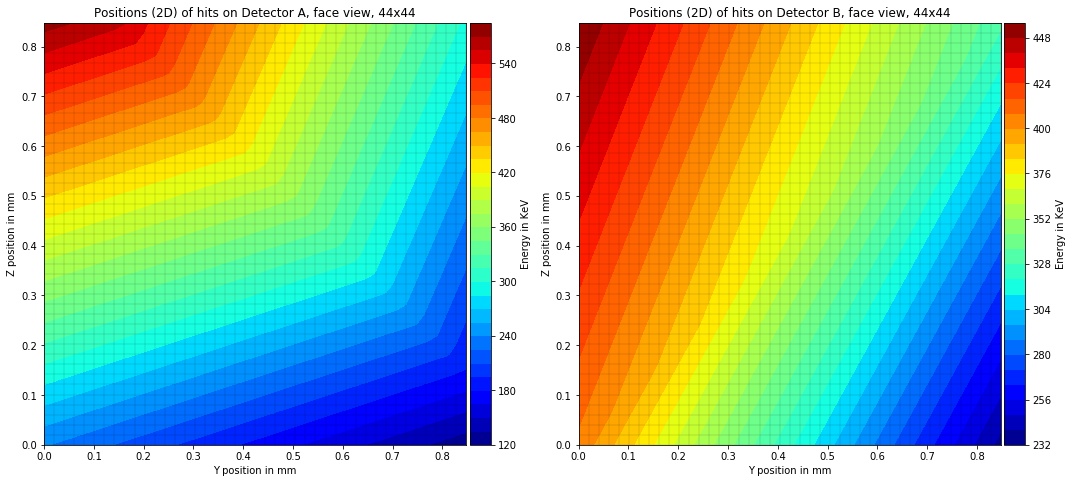

In [10]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
leng =  80504
fig, ax = plt.subplots(1,2, figsize=(15, 15))

xA = aar[:leng, 0]
yA = aar[:leng, 1]
depA = aar[:leng, 2]
yminA = min(aar[:leng, 0])
ymaxA = max(aar[:leng, 0])
zminA = min(aar[:leng, 1])
zmaxA = max(aar[:leng, 1])

xB = bar[:leng, 0]
yB = bar[:leng, 1]
depB = bar[:leng, 2]
yminB = min(bar[:leng, 0])
ymaxB = max(bar[:leng, 0])
zminB = min(bar[:leng, 1])
zmaxB = max(bar[:leng, 1])


# yi, zi = np.meshgrid(np.linspace(-0.42396, 0.42396, 48), np.linspace(-0.42396, 0.42396, 48))
xiRdg, yiRdg = np.meshgrid(np.linspace(0, 0.84792, 43), np.linspace(0, 0.84792, 43))
X,Y = np.meshgrid(xiRdg,yiRdg)

diA = griddata((xA, yA), depA, (X, Y))
diB = griddata((xB, yB), depB, (X, Y))

posA = ax[0].contourf(X, Y, diA, 30, cmap='jet')
ax[0].plot(xiRdg, yiRdg, 'k-', lw=0.3, alpha=0.4)
ax[0].plot(xiRdg.T, yiRdg.T, 'k-', lw=0.3, alpha=0.4)
ax[0].set_title('Positions (2D) of hits on Detector A, face view, 44x44')
ax[0].set_xlabel('Y position in mm')
ax[0].set_ylabel('Z position in mm')
ax[0].set_aspect('equal')

divider = make_axes_locatable(ax[0])
cax2 = divider.append_axes("right", size="5%", pad=0.05)
cbr = fig.colorbar(posB, cax=cax2)
cbr.ax.set_ylabel('Energy in KeV')
plt.tight_layout(h_pad=1)

posB = ax[1].contourf(X, Y, diB, 30, cmap='jet')
ax[1].plot(xiRdg, yiRdg, 'k-', lw=0.3, alpha=0.4)
ax[1].plot(xiRdg.T, yiRdg.T, 'k-', lw=0.3, alpha=0.4)
ax[1].set_title('Positions (2D) of hits on Detector B, face view, 44x44')
ax[1].set_xlabel('Y position in mm')
ax[1].set_ylabel('Z position in mm')
ax[1].set_aspect('equal')

#cbr = fig.colorbar(posB, ax=ax)
#cbr.set_label('Energy in MeV', rotation=270)

divider = make_axes_locatable(ax[1])
cax2 = divider.append_axes("right", size="5%", pad=0.05)
cbr = fig.colorbar(posB, cax=cax2)
cbr.ax.set_ylabel('Energy in KeV')
plt.tight_layout(h_pad=1)

plt.savefig('Plots/energy_rdg_data.png')

# Counts in Crystal RDG Data

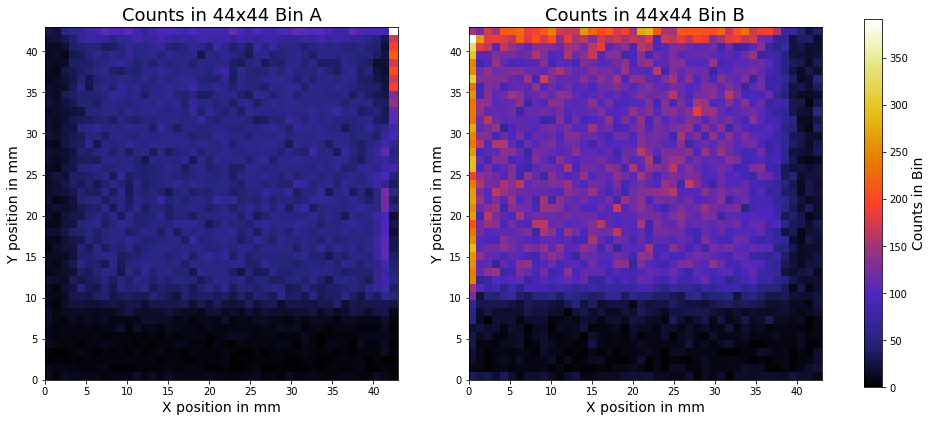

In [11]:
fig, ax = plt.subplots(1,2, figsize=(15, 15))

h = ax[0].hist2d(xA, yA, bins=44, cmap='CMRmap')
ax[0].set_title('Counts in 44x44 Bin A', fontsize=18)
ax[0].set_xlabel('X position in mm', fontsize=14 )
ax[0].set_ylabel('Y position in mm', fontsize=14 )
ax[0].set_aspect('equal')

h1= ax[1].hist2d(xB, yB, bins=44, cmap='CMRmap')
ax[1].set_title('Counts in 44x44 Bin B', fontsize=18)
ax[1].set_xlabel('X position in mm', fontsize=14)
ax[1].set_ylabel('Y position in mm', fontsize=14)
ax[1].set_aspect('equal')

cbar = plt.colorbar(h[3], ax=ax, fraction=.022)
cbar.ax.set_ylabel('Counts in Bin', fontsize=14)

plt.savefig('Plots/singles_pos_rdg_data_44.png')

# Counts in Anode RDG Data

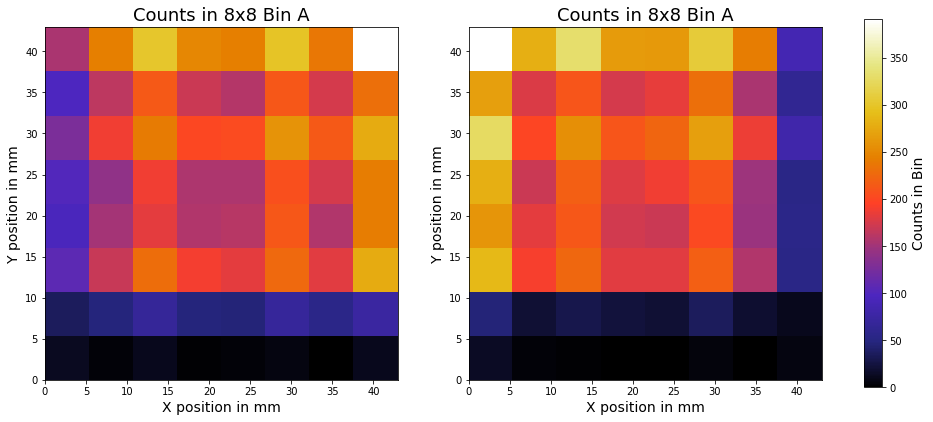

In [12]:
fig, ax = plt.subplots(1,2, figsize=(15, 15))

h2 = ax[0].hist2d(xA, yA, bins=8, cmap='CMRmap')
ax[0].set_title('Counts in 8x8 Bin A', fontsize=18)
ax[0].set_xlabel('X position in mm', fontsize=14 )
ax[0].set_ylabel('Y position in mm', fontsize=14 )
ax[0].set_aspect('equal')


h3= ax[1].hist2d(xB, yB, bins=8, cmap='CMRmap')
ax[1].set_title('Counts in 8x8 Bin A', fontsize=18)
ax[1].set_xlabel('X position in mm', fontsize=14 )
ax[1].set_ylabel('Y position in mm', fontsize=14 )
ax[1].set_aspect('equal')

cbar = plt.colorbar(h[3], ax=ax, fraction=.022)
cbar.ax.set_ylabel('Counts in Bin', fontsize=14)

plt.savefig('Plots/singles_pos_rdg_data_anode.png')

# Energy Spectrum Graph Simulated Data

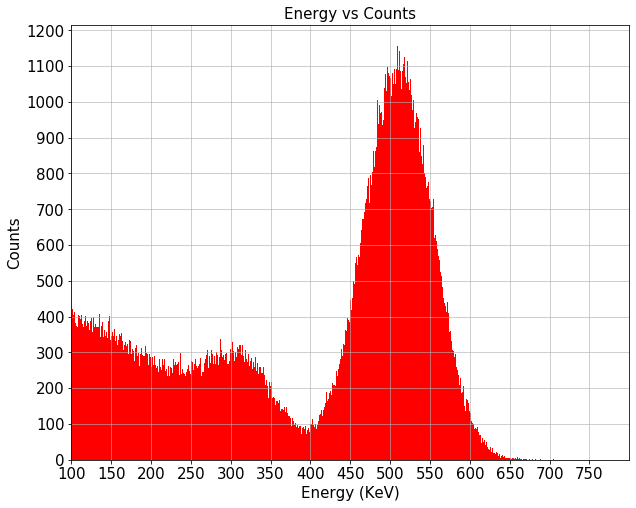

In [13]:
#All my simulated Data
crystalarr2 = np.column_stack((x,y,z,crystalID,energy,time))
crystalarr2[:,4] *= 1000
plt.figure(figsize=[10,8])
plt.hist(crystalarr2[:,4], bins = 1000,  color='r', linewidth=1) 
plt.title("Energy vs Counts",fontsize=15 ) 
plt.yticks(np.arange(0, 1300, step=100)) 
plt.xticks(np.arange(100, 800, step=50)) 
plt.xlim(100, 800)
plt.grid(axis='y', alpha=0.75)
plt.grid(axis='x', alpha=0.75)
#plt.yscale('log')
plt.xlabel('Energy (KeV)',fontsize=15)
plt.ylabel('Counts',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('Plots/EvsCounts_all.png')
plt.show()

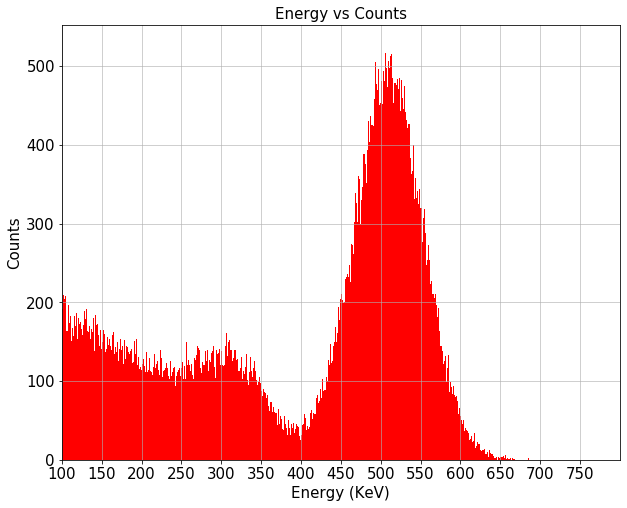

In [14]:
#only as many counts as RDG
crystalarr2 = np.column_stack((x[:161007],y[:161007],z[:161007],crystalID[:161007],energy[:161007],time[:161007]))
crystalarr2[:,4] *= 1000
plt.figure(figsize=[10,8])
plt.hist(crystalarr2[:,4], bins = 1000,  color='r', linewidth=1) 
plt.title("Energy vs Counts",fontsize=15 ) 
plt.yticks(np.arange(0, 600, step=100)) 
plt.xticks(np.arange(100, 800, step=50)) 
plt.xlim(100, 800)
plt.grid(axis='y', alpha=0.75)
plt.grid(axis='x', alpha=0.75)
#plt.yscale('log')
plt.xlabel('Energy (KeV)',fontsize=15)
plt.ylabel('Counts',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('Plots/EvsCounts_matchRDGcount.png')
plt.show()

# Energy Spectrum Graph RDG Dada

[[ 27  14 547   0]
 [ 21  39 359   0]
 [ 16  20 538   0]
 ...
 [  0   5 122  60]
 [ 27  12 168  60]
 [  0  12 486  60]]
[547 359 538 ... 122 168 486]


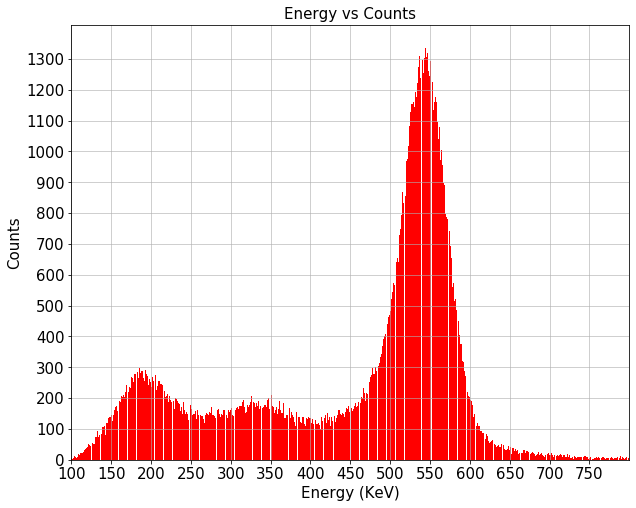

In [15]:
totstack = np.vstack((aar,bar))
print(totstack)
totE = totstack[:,2]
print(totE)
# totEar = totEar1[np.where((totEar1[:,2] > 100))[0]]
plt.figure(figsize=[10,8])
plt.hist(totE, bins = 1000,  color='r', linewidth=1) 
plt.title("Energy vs Counts",fontsize=15 ) 
plt.yticks(np.arange(0, 1400, step=100)) 
plt.xticks(np.arange(100, 800, step=50)) 
plt.xlim(100, 800)
plt.grid(axis='y', alpha=0.75)
plt.grid(axis='x', alpha=0.75)
#plt.yscale('log')
plt.xlabel('Energy (KeV)',fontsize=15)
plt.ylabel('Counts',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('Plots/EvsCounts_rdg.png')
plt.show()

# Calculate FWHM of RDG Data

In [16]:
totEar = totE[np.where((totE > 400) & (totE < 625))[0]]
dfa = pd.DataFrame(data=totEar,columns=["energy"])
print(dfa.mean())
dfcounts = dfa['energy'].value_counts()
print('STD_RDG:', dfa.std(axis = 0))
sigma = dfa.std(axis = 0)
fwhm = 2.35*sigma
print('FWHM_RDG:', fwhm)

energy    531.128843
dtype: float64
STD_RDG: energy    42.412523
dtype: float64
FWHM_RDG: energy    99.66943
dtype: float64


# Calculate FWHM of Simulated Data

In [ ]:
#All simulated Events
mydata = np.column_stack((energy)).T
mydata1 = mydata*1000
mydata2 = mydata1[np.where((mydata1 > 400) & (mydata1< 625))[0]]
dfb = pd.DataFrame(data=mydata2,columns=["energy"])
print(dfb.mean())
dfcounts = dfb['energy'].value_counts()
print('STD_RDG:', dfb.std(axis = 0))
sigma = dfb.std(axis = 0)
fwhm = 2.35*sigma
print('FWHM_RDG:', fwhm)

In [ ]:
#Only first 161007 events
mydata = np.column_stack((energy)).T
mydata1 = mydata[:161007]
mydata1 = mydata1*1000
mydata2 = mydata1[np.where((mydata1 > 400) & (mydata1< 625))[0]]
dfc = pd.DataFrame(data=mydata2,columns=["energy"])
print(dfc.mean())
dfcounts = dfc['energy'].value_counts()
print('STD_RDG:', dfc.std(axis = 0))
sigma = dfc.std(axis = 0)
fwhm = 2.35*sigma
print('FWHM_RDG:', fwhm)

# Side View of Detectors Simulated Data

In [ ]:
hits_x = singles.arrays()[b'globalPosX']
hits_y = singles.arrays()[b'globalPosY']
plt.figure(figsize=[10,8])
plt.scatter(hits_x, hits_y, alpha=0.1, s=3)
plt.title('Side View of Positions (2D) of Singles in the Detector', fontsize=18)
plt.xlabel('X position in mm', fontsize=14)
plt.ylabel('Y position in mm', fontsize=14)
plt.savefig('Plots/sings_birdeye.png')

# DataFrame Example

In [ ]:
dfA = pd.DataFrame(data=singA, columns=["X (mm)", "Y(mm)","Z(mm)","CrysID","Energy(KeV)","time (s)"])
dfB = pd.DataFrame(data=singB, columns=["X (mm)", "Y(mm)","Z(mm)","CrysID","Energy(KeV)","time (s)"])
#np.savetxt('dfAsing.txt', dfA.values)
#np.savetxt('dfBsing.txt', dfB.values)
sortDfA = dfA.sort_values(by=["CrysID"])
#sortDfB = dfB.sort_values(by=['CrysID'])
print(dfB)
print (dfA)

# Read in Hit Data

In [ ]:
hits = f[b'Hits']
print('Number of hits:', len(hits))
print('Hits: ')
for i in hits.keys():
    print(i, ' ', end='')

# Read in Coincident Data

In [ ]:
coinc = f[b'Coincidences']
print('Number of coincidences :', len(coinc))
print('coinc: ')
for i in coinc.keys():
    print(i, ' ', end='')

# LOR Graph

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

x1 = coinc.arrays()[b'globalPosX1']
y1 = coinc.arrays()[b'globalPosY1']
x2 = coinc.arrays()[b'globalPosX2']
y2 = coinc.arrays()[b'globalPosY2']

print(b'globalPosX1'[:100])
ax.plot([x1,x2],[y1,y2])

ax.autoscale()
ax.set_xlabel('Position in mm')
ax.set_ylabel('Poisition in mm')
ax.set_title('Lines of response (LOR)')